<font size="5">Tarea 3: Felipe Conejeros y Mabel González</font>

# Parte 1
### Pregunta 1: 

* Para realizar el experimento aleatorizado, se sugiere aplicar un tratamiento de décimas de incentivo para los estudiantes que asistan a clase. Estas décimas no serían parte de la nota, sino puntos extra añadidos a la nota obtenida, de esta manera se elimina el posible efecto negativo que puede causar que los estudiantes se vean "obligados a asistir a clase", y se destaca el efecto positivo de lograr beneficios por asistir. 
* El tratamiento consistirá en entregar 1 décima a cada alumno del grupo tratamiento por cada clase a la que asista. 
* El experimento sería aplicado en un plazo de un semestre, y se utilizaría un curso con 2 certamenes por semestre, donde el tratamiento se aplica finalizado el primer certamen y antes del segundo, con el fin de medir los resultados pre y post tratamiento. 
* Se escoge un periodo semestral para además considerar el efecto que tiene el paso del tiempo en la asitencia, donde se espera que a medida que avance el semestre la asistencia del grupo control vaya disminuyendo debido a factores como desmotivación o falta de tiempo. 
* No existirán costos ni materiales para poder aplicar el tratamiento.

### Pregunta 2:

* El experimento será aplicado a un curso de Logística de 50 alumnos, ya que es considerado un curso de dificultad media y por lo tanto se espera que exista un grupo que asista consistentemente a clases y otro que no siempre asista, ya sea porque no lo considera indispensable o prefiera priorizar el tiempo para estudiar otras asignaturas.
* De los 50 alumnos, 25 serán tratamiento y 25 serán control
* El mecanismo de asignación aleatorio consistirá en generar números aleatorios entre el 1 y el 50 con un programa de Python, y los primeros 25 números obtenidos corresponderán al grupo de tratamiento según la numeración de los alumnos en la lista de clases. 
* Una vez finalizado el primer certamen del semestre, se les informará individualmente a cada estudiante del grupo de tratamiento que recibirán décimas por asistencia para el segundo certamen si asisten a las clases siguientes. Además, se les mencionará que se está evaluando dar décimas a todos los alumnos del curso, pero que la única forma que esto funcione es si no se lo comentan a nadie más para no afectar la evaluación. De esta manera se espera disminuir la contaminación del exprimento entre grupos e intra grupos, asumiendo que de todas maneras esta podría existir. 

### Pregunta 3:

* Se considera más apropiado aplicar el método pre-post test porque permite analizar la diferencia de resultados en la asistencia entre tratamiento y control después con antes del tratamiento, de esta forma se puede analizar el efecto promedio que tiene el tratamiento en la asistencia del grupo tratamiento, y además cómo afecta naturalmente el paso del tiempo en el semestre en la asistencia del grupo control. Este método es menos complejo que el método Salomon ya que solo considera 2 grupos, y es menos probable que se contamine el análisis. 

### Pregunta 4:

* Para ajustar el experimento a nivel de clusters, primero se considerarán todos los cursos de la universidad que tengan clase a las 8 am, tengan 3 créditos y que tengan aproximadamente 50 alumnos. De todos estos cursos se escogerán aleatoriamente 6, pudiendo estos ser de cualquier facultad, siempre y cuando no requieran algún tipo de actividad práctica que necesite asistencia obligatoria. Al considerar las características anteriores se busca que los cursos sean comparables en cierto nivel. 
* Se espera que además, al considerar cursos de diferentes facultades se elimine cualquier tipo de contaminación entre grupos, ya que es muy poco probable que los grupos interactuen entre ellos o que su comportamiento se vea influenciado al conocer información acerca de otros grupos. 
* De los 6 cursos se tendrán 3 tratamiento y 3 control, que serán asignados aleatoriamente mediante un programa Python. 
* En cuanto al tratamiento, este seguirá siendo un incentivo de tipo décimas que se ofrecerá a todos los estudiantes de los cursos tratamiento a mitad del semestre, con el fin de evaluar su asistencia previo y post tratamiento. En los cursos control se medirá cómo progresa su asistencia con el avance del semestre al no recibir tratamiento. 

### Pregunta 5:

* Al tratarse de un programa aplicado a nivel de toda la universidad ya no existiría un grupo control ya que todos serían tratados, por lo que estaríamos frente a un estudio de eventos. 
* En este caso se puede usar series de tiempo para crear el contrafactual de la tendencia que el outcome habría seguido en ausencia de la política, comparando a los mismos individuos en el tiempo. 
* En este escenario podemos examinar el efecto que tiene ofrecer décimas a los alumnos en su nivel de asistencia en un año, en comparación con un año anterior sin décimas por asistencia, por lo que el período total de análisis sería de 2 años, siendo necesario medir la asistencia en ambos períodos y sin informar anticipadamente a los alumnos que el segundo año se ofrecerá este incentivo, para así eliminar el efecto de anticipación que esto podría tener. 
* Se utilizaría el período de 1 año para medir la asistencia pre y post debido a que se cree que la asistencia no es homogénea a lo largo del año académico, disminuyendo en el segundo semestre. 
* Cabe mencionar que este método esta sujeto a factores externos que quedan fuera del control de los investigadores y que podrían influir en la variación de la asistencia de un año a otro, aparte de la intervención estudiada, como pueden ser por ejemplo una pandemia, o alguna contingencia nacional que impida realizar clases normalmente. 

# Parte 2

In [1]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import linearmodels.panel as lmp
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid

%matplotlib inline

### Pregunta 6
En primer lugar se generan 3 variables de ruido con una distribución normal. Luego se procede a construir la función Y que permita generar la data, que se muestra en la pregunta 7.

In [2]:
# experiment parameters
np.random.seed(256) #set seed
nsize = 4000 #tamaño de muestra

In [3]:
Z = norm.rvs(size=(3, nsize)) #vector de variables N(0,1)
Z = Z.transpose() #se transpone Xc
Xc = pd.DataFrame(Z, columns=['X1','X2','X3']) #variables de ruido
Xc

,X1,X2,X3
0,0.104303,1.281431,0.616696
1,-0.550113,-0.803968,-0.608890
2,-0.072715,0.903348,1.557262
3,-0.355103,0.197202,-0.787297
4,-0.532822,0.367345,0.586667
...,...,...,...
3995,-1.477832,-0.006040,0.224798
3996,1.901817,0.260604,0.324397
3997,1.678148,-1.630959,-0.746817
3998,-0.038047,-0.385063,-0.821242


### Pregunta 7

In [4]:
#time periods and treatment asignment 
Xc['p'] = 1  #se crea columna con periodo 1 para todos los datos
Xc.loc[0:1999,'p'] = 0  #se asigna a los datos del 0 al 4999 el periodo 0
tr = np.random.binomial(1, 0.5, size=2000) #estatus de tratamiento
Xc.loc[0:1999,'T'] = tr
Xc.loc[2000:3999,'T'] = tr

Xc['cl']=1 

x = 0
y = 49

for i in range(40):
    Xc.loc[x:y,'cl'] = i + 1
    x += 50
    y += 50

x = 2000
y = 2049
for i in range(40):
    Xc.loc[x:y,'cl'] = i + 1
    x += 50
    y += 50

### Pregunta 8
Dados los datos entregados sobre asistencia en el pre test y post test, se construye la variable Y a partir de los valores de $\alpha$ , $\delta$ y $\gamma$, obtenidos al aplicar la inversa de la distribución normal. 

Sea:
* Pre-test\
Control (p=0, T=0): 80% de probabilidad\
y = $\alpha$, si y = 0.80 entonces $z_\alpha$ = 0.85


* Post test\
Control (p=1, T=0): 75% de probabilidad\
y = $\alpha$ + $\delta$, si y = 0.75 entonces $z_\delta$ = 0.61


* Tratamiento (p=1, T=1): 90% de probabilidad\
y = $\alpha$ + $\delta$ + $\gamma$, si y = 0.90 entonces $z_\gamma$ = 0.17

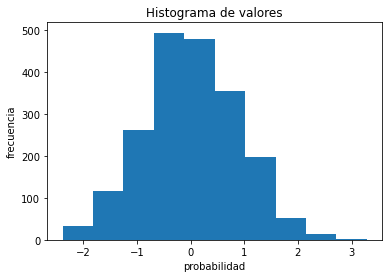

In [5]:
# variable resultado con ruido
Xc['y'] = 0.85 * (Xc['X1']) + 0.61 * (Xc['T'] * Xc['p'] * Xc['X2']) + -0.17 * (Xc["p"] * Xc['X3'])

plt.hist(Xc.loc[(Xc["p"]==0),"y"], 10)
plt.xlabel("probabilidad")
plt.ylabel("frecuencia")
plt.title("Histograma de valores")
plt.show()
  

In [6]:
# probabilidad acumulada, variable continua entre 0 y 1
Xc["y_acum"] = norm.cdf(Xc["y"]) 
Xc.describe()

,X1,X2,X3,p,T,cl,y,y_acum
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000
mean,0.008117,-0.006831,0.008701,0.500000,0.517000,20.50000,0.005820,0.501108
std,1.011710,1.004973,1.000460,0.500063,0.499773,11.54484,0.917684,0.273718
min,-3.137899,-3.927773,-3.438901,0.000000,0.000000,1.00000,-3.860441,0.000057
25%,-0.680052,-0.704784,-0.668397,0.000000,0.000000,10.75000,-0.607459,0.271773
50%,0.007468,-0.009453,0.035081,0.500000,1.000000,20.50000,-0.004676,0.498135
75%,0.681447,0.678221,0.699113,1.000000,1.000000,30.25000,0.610999,0.729400
max,3.866746,3.339142,3.972654,1.000000,1.000000,40.00000,3.532890,0.999794


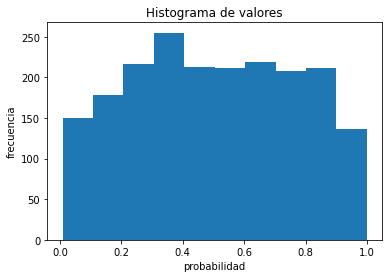

In [7]:
plt.hist(Xc.loc[(Xc["p"]==0),"y_acum"], 10)
plt.xlabel("probabilidad")
plt.ylabel("frecuencia")
plt.title("Histograma de valores")
plt.show()

In [8]:
# Se agrupará para que la variable Xc["y"] sea binaria (división arbitraria)
a = 0.78
b = 0.60
c = 0.91

# 80%
Xc.loc[(Xc["y_acum"] > a) & (Xc["p"] == 0), "y"] = 0
Xc.loc[(Xc["y_acum"] <= a) & (Xc["p"] == 0), "y"] = 1

# 75%
Xc.loc[(Xc["y_acum"] > b) & (Xc["p"] == 1), "y"] = 0
Xc.loc[(Xc["y_acum"] <= b) & (Xc["p"] == 1), "y"] = 1

# 90%
Xc.loc[(Xc["y_acum"] > c) & (Xc["p"] == 1) & (Xc["T"] == 1), "y"] = 0
Xc.loc[(Xc["y_acum"] <= c) & (Xc["p"] == 1) & (Xc["T"] == 1), "y"] = 1  

Xc.groupby(by = ["p","T"]).mean()

X1        X2        X3         cl         y    y_acum
p T                                                               
0 0.0  0.033019 -0.024681 -0.016291  20.946170  0.810559  0.509027
  1.0  0.003958  0.000303  0.051159  20.083172  0.791103  0.498830
1 0.0  0.031543  0.004077  0.008905  20.946170  0.597308  0.505931
  1.0 -0.032873 -0.007481 -0.010599  20.083172  0.904255  0.491483

In [9]:
agrupado = Xc.groupby(by = ["p"]).mean()
agrupado

,X1,X2,X3,T,cl,y,y_acum
p,,,,,,,
0,0.017995,-0.011765,0.018581,0.517,20.5,0.8005,0.503756
1,-0.001760,-0.001898,-0.001179,0.517,20.5,0.7560,0.498461


Se observa que se cumple que para 

Pre-test / Control = 0.81 , cercano a 80%\
Pre-test / Tratamiento = 0.79 , cercano a 80%

Post test / Control = 0.74 , cercano a 75%\
Post test / Tratamiento = 0.87 , cercano a 90%

## Pregunta 9

In [10]:
y = Xc.loc[0:1999,'y']
X = Xc.loc[0:1999,'T']
X = sm.add_constant(X) #regresión simple con una constante
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.183
Date:                Mon, 28 Nov 2022   Prob (F-statistic):              0.277
Time:                        20:57:14   Log-Likelihood:                -1002.8
No. Observations:                2000   AIC:                             2010.
Df Residuals:                    1998   BIC:                             2021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8106      0.013     63.028      0.0

C:\Users\felip\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
#post-test
y = Xc.loc[2000:,"y"]
X = Xc.loc[2000:,"T"]
X = sm.add_constant(X)
model = sm.Logit(y, X)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.488766
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1998
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                  0.1204
Time:                        20:57:14   Log-Likelihood:                -977.53
converged:                       True   LL-Null:                       -1111.3
Covariance Type:            nonrobust   LLR p-value:                 3.930e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3943      0.066      6.010      0.000       0.266       0.523
T              1.8512      0.

C:\Users\felip\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Por cada unidad porcentual que aumenta T, y aumenta en 1.7467%

Ahora, basado en la data generada podemos estimar el efecto del tratamiento (post-test only) usando OLS y creado algunas variables adicionales según sea necesario. Restringimos a la data del segundo periodo, cuando el tratamiento ocurre. 

In [12]:
y = Xc.loc[2000:3999,'y']
X = Xc.loc[2000:3999,'T']
X = sm.add_constant(X) #regresión simple con una constante
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

#forma Y= alfa + beta*T

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     292.1
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.17e-61
Time:                        20:57:14   Log-Likelihood:                -1011.1
No. Observations:                2000   AIC:                             2026.
Df Residuals:                    1998   BIC:                             2037.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5973      0.013     46.253      0.0

C:\Users\felip\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Ahora estimamos via OLS el efecto del tratamiento usando diferencias en diferencias. Usamos toda la data, y creamos una variable que representa la interacción entre el tiempo y el estatus del tratamiento. Por construcción, las variables de tiempo y estatus de tratamiento no tienen impacto en el outcome. 

In [13]:
#pre-post test

y=Xc['y']
Xc['dd']= Xc['p']*Xc['T'] 
X=Xc[['p','T','dd']] #variables 
X = sm.add_constant(X) #constante
model = sm.OLS(y, X) #modelo OLS
results2 = model.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     102.3
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           8.72e-64
Time:                        20:57:14   Log-Likelihood:                -2014.0
No. Observations:                4000   AIC:                             4036.
Df Residuals:                    3996   BIC:                             4061.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8106      0.013     62.897      0.0

C:\Users\felip\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
#pre-post test

y=Xc['y']
Xc['dd']= Xc['p']*Xc['T'] #dd=p*T (variable interacción de tiempo con tratamiento). Estimador de diferencias en diferencias
X=Xc[['p','T','dd']] #variables 
X = sm.add_constant(X) #constante
model = sm.Logit(y, X) #modelo OLS
results2 = model.fit()
print(results2.summary())

print(results2.get_margeff().summary())

#quien esta asignado a tratamiento o no no deberia tener ningun efecto, tampoco el periodo (no hay tendencia por
#lo tanto no deberia haber efeco por estar en un periodo u otro), la constante y la var dd deberian ser significativas. 

C:\Users\felip\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.494089
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3996
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                 0.06620
Time:                        20:57:14   Log-Likelihood:                -1976.4
converged:                       True   LL-Null:                       -2116.5
Covariance Type:            nonrobust   LLR p-value:                 1.917e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4536      0.082     17.704      0.000       1.293       1.615
p             -1.0594      0.

Finalmente, estimamos diferencias en diferencias pero ajustando los errores estandar basados en la variable cluster. Dado que no creamos correlacion dentro de los grupos, las diferencias entre ambos estimadores son despreciables. 

10. Estime el efecto ajustando los errores estandar por cluster (la variable grupo representa cada clase). Cual es la diferencia entre ambas estimaciones? Explique porque es esperable (o no) encontrar diferencias entre ambos metodos.

In [15]:
#clustered standard errors
results3 = model.fit(cov_type="cluster", cov_kwds={'groups': Xc['cl']})
print(results3.summary())

#Se repite el analisis con cluster. Minimos cuadrados sobre el modelo ya definido, ahora la matriz de convarianzas esta ajustada
#por cluster, es decir dentro de grupos. 
#Los errores estandar cambiaron
#El efecto del grupo es muy marginal porque no agregamos correlaciones entre grupos.
#Mientras mas correlación hay, la distancia entre los valores promedio y los extremos es más grande, se traduce en errores
#estandar más grandes

Optimization terminated successfully.
         Current function value: 0.494089
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3996
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Nov 2022   Pseudo R-squ.:                 0.06620
Time:                        20:57:14   Log-Likelihood:                -1976.4
converged:                       True   LL-Null:                       -2116.5
Covariance Type:              cluster   LLR p-value:                 1.917e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4536      0.093     15.689      0.000       1.272       1.635
p             -1.0594      0.

## Parte 3
Usando charls.csv estimaremos un estimador basico de diferencia (efecto del tratamiento), intención de tratar, y variables intrumentales. La intervencion es una pensión pública (nrps) y el resultado es el estatus de retirement.

In [19]:
charls = pd.read_csv('../data/charls.csv')

charls.dropna(inplace=True)
charls.reset_index(drop=True, inplace=True)

    
charls.describe()

,age,bnrps,cesd,child,dnrps,female,hrsusu,hsize,intmonth,married,nrps,retage,retired,schadj,urban,wave,wealth,inid
count,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,21045.000000,2.104500e+04,21045.000000
mean,59.386553,59.610683,8.656878,2.825232,0.740889,0.521026,2.548166,3.585222,7.511143,0.907674,0.519078,1.280969,0.204942,4.162414,0.206652,1.909385,6.783959e+03,12747.082870
std,9.016106,51.905928,6.307677,1.372179,0.438157,0.499570,1.757182,1.720136,0.865851,0.289492,0.499648,3.830963,0.403669,3.540039,0.404914,0.817975,5.453065e+04,7769.025809
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.648450e+06,1.000000
25%,52.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,2.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+02,5176.000000
50%,59.000000,60.000000,7.000000,3.000000,1.000000,1.000000,3.401197,3.000000,7.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,2.000000,1.000000e+03,13314.000000
75%,65.000000,74.875404,12.000000,4.000000,1.000000,1.000000,4.025352,5.000000,8.000000,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000,3.000000,6.800000e+03,19650.000000
max,95.000000,300.000000,30.000000,10.000000,1.000000,1.000000,5.123964,16.000000,12.000000,1.000000,1.000000,51.000000,1.000000,16.000000,1.000000,3.000000,1.040000e+06,25403.000000


In [20]:
# copia del dataframe para intervenirlo
charls_copy = charls[:]

In [21]:
respuesta = []
for i in range(len(charls_copy)):
    if charls_copy["drinkly"][i] not in respuesta:
        respuesta.append(charls_copy["drinkly"][i])
print(respuesta)

['0', '1', '.m']


### Pregunta 11

In [22]:
# definiendo las observaciones que están en tratamiento y no
# tratamiento para individuos con más de 2 hijos
charls_copy["T"] = 0
charls_copy["T"][charls_copy["child"] > 2] = 1

<ipython-input-22-2d558080cf10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charls_copy["T"] = 0
<ipython-input-22-2d558080cf10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charls_copy["T"][charls_copy["child"] > 2] = 1
C:\Users\felip\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result

In [23]:
# variable sdrinkly
# se procede a eliminar las observaciones que tienen como respuesta ".m"
# charls_copy = charls_copy[charls_copy["drinkly"] != ".m"]
# charls_copy["drinkly"] = charls_copy["drinkly"].astype(int);
charls_copy["sdrinkly"] = charls_copy["drinkly"]

charls_copy['index'] = charls_copy.index
charls_copy

<ipython-input-23-bf349685cf7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charls_copy["sdrinkly"] = charls_copy["drinkly"]
<ipython-input-23-bf349685cf7f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charls_copy['index'] = charls_copy.index


,age,bnrps,cesd,child,dnrps,drinkly,female,hrsusu,hsize,intmonth,...,retage,retired,schadj,urban,wave,wealth,inid,T,sdrinkly,index
0,46,0.000000,6.0,2,0,0,1,0.000000,4,7,...,24,0,0,0,1,-5800.0,1,0,0,0
1,48,58.964134,7.0,2,1,0,1,3.891820,4,7,...,17,0,0,0,2,100.0,1,0,0,1
2,50,60.000130,5.0,2,1,0,1,4.025352,7,8,...,10,0,0,0,3,-59970.0,1,0,0,2
3,48,0.000000,0.0,2,0,1,0,4.143135,4,7,...,22,0,4,0,1,-5800.0,2,0,1,3
4,50,58.964134,5.0,2,1,1,0,3.891820,4,7,...,0,0,4,0,2,100.0,2,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,55,87.628258,4.0,4,1,0,1,0.000000,4,8,...,0,0,0,0,2,0.0,25400,1,0,21040
21041,57,70.879349,2.0,4,1,1,1,0.000000,3,8,...,0,1,0,0,3,900.0,25400,1,1,21041
21042,71,87.628258,3.0,5,1,1,0,0.000000,1,9,...,0,0,4,0,2,600.0,25401,1,1,21042
21043,49,87.628258,13.0,4,1,1,1,4.025352,3,8,...,1,0,4,0,2,5300.0,25402,1,1,21043


In [24]:
# calcular proporcion de sdrinkly en el período 3
prop_0 = 0
prop_1 = 0
for i in range(len(charls_copy)):
    if charls_copy["wave"][i] == 3 and charls_copy["sdrinkly"][i] == "0" and charls_copy["child"][i] >= 3:
        prop_0 += 1
        
for i in range(len(charls_copy)):
    if charls_copy["wave"][i] == 3 and charls_copy["sdrinkly"][i] == "1" and charls_copy["child"][i] >= 3:
        prop_1 += 1
        
print("Sea la proporción de los que beben en el período 3 y tienen más o igual que 3 hijos:", (prop_1 / (prop_0 + prop_1)))
print("Sea la proporción de los que no beben en el período 3 y tienen más o igual que 3 hijos:", (prop_0 / (prop_0 + prop_1)))

Sea la proporción de los que beben en el período 3 y tienen más o igual que 3 hijos: 0.32818294190358466
Sea la proporción de los que no beben en el período 3 y tienen más o igual que 3 hijos: 0.6718170580964153


In [25]:
# la mitad de la proporción
cambio_1 = prop_1 / 2
print("Se cambiarán 1s a 0s", cambio_1, "observaciones aleatoriamente")

k = 0
itera = 0
for i in range(len(charls_copy)):
    if charls_copy["wave"][i] == 3 and charls_copy["sdrinkly"][i] == "1" and charls_copy["child"][i] >= 3:
        charls_copy["sdrinkly"][i] = "0"
        # guardar las posiciones de la fila en una lista
        k += 1
        itera += 1
    if itera == cambio_1:
        break

Se cambiarán 1s a 0s 531.0 observaciones aleatoriamente


<ipython-input-25-c645c7f6c6c7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charls_copy["sdrinkly"][i] = "0"


<font size="3">**Tarea 3**</font>

<u> *Instrucciones* </u>

Los resultados de los ejericicios propuestos se deben entregar como un notebook por correo electronico a *juan.caro@uni.lu* el dia 25/11 hasta las 21:00. 

Es importante considerar que el código debe poder ejecutarse en cualquier computadora con la data original del repositorio. Recordar la convencion para el nombre de archivo ademas de incluir en su documento titulos y encabezados por seccion. La unica data real a utilizar en parte de esta tarea es **charls.csv**. El resto de la data de la tarea debe ser generada a partir de las caracteristicas que se especifican. Las variables en **charls.csv** tienen la siguiente descripcion:

- inid: identificador unico
- wave: periodo de la encuesta (1-3)
- cesd: puntaje en la escala de salud mental (0-30)
- child: numero de hijos
- drinkly: bebio alcohol en el ultimo mes (binario)
- hrsusu: horas promedio trabajo semanal
- hsize: tamano del hogar
- intmonth: mes en que fue encuestado/a (1-12)
- married: si esta casado/a (binario)
- retired: si esta pensionado/a (binario)
- schadj: años de escolaridad
- urban: zona urbana (binario)
- wealth: riqueza neta (miles RMB)
- age: edad al entrar a la encuesta (no varia entre periodos)
- bnrps: monto de pension publica (en RMB/mes)
- dnrps: pension implementada en la provincia (binaria)
- retage: fecha esperada de retiro (años desde la fecha de encuenta)
- female: genero del encuestado
- nrps: recibe pension publica

Preguntas:

Parte 1 - Experimentos

Deben conceptualizar un experimento con el objetivo de estudiar posibles incentivos o estrategias para incrementar la asistencia a clases en estudiantes universitarios de la UdeC. El outcome del tratamiento es la proporcion promedio de estudiantes que asisten a clases. Todos los elementos del experimento deben ser definidos, respondiendo a las siguientes preguntas: 

1. Asumiendo la existencia de recursos disponibles e implementacion a nivel de estudiante, sugiera un tratamiento que pueda ser testeado a traves de un experimento aleatorizado controlado. Sea especifico en cuanto a los detalles del tratamiento (costos, materiales, duracion, etcetera).

2. Defina los grupos de tratamiento y control para implementar su experimento. Describa en detalle el mecanismo de asignacion aleatorio que permite la comparacion entre grupos.

3. Que metodo considera el mas apropiado para la estimacion del efecto promedio? (pre-test, pre-post test, Salomon 4 group). Justifique su respuesta en base a las ventajas y desventajas de cada metodo. 

4. Ahora suponga que no es posible implementar un experimento a nivel de estudiante, sino a nivel de clase. Como ajustaria los elementos de su experimento para poder ser implementado a nivel de cluster? Sea especifico respecto tanto del tratamiento como del metodo de asignacion aleatorio y potencial comparacion entre grupos de tratamiento y control.

5. Suponga que en vez de un experimento, se planifica que sea un programa implementado a nivel de toda la Universidad. Como ajustaria los elementos descritos anteriormente para poder comparar el efecto de la intervencion.  

Parte 2 - Estimacion de efectos promedio de tratamiento (data simulada)

6. A partir de sus respuestas en Parte 1, genere data para 40 grupos (considere cada grupo como una clase) con 50 estudiantes cada uno (asuma que los estudiantes son asignados aleatoriamente a cada clase). Cada estudiante debe tener data de asistencia en un periodo, generando una variable binaria aleatoria talque la asistencia promedio a traves de todos los grupos es de 80%.

7. Genere un mecanismo de asignacion aleatorio a nivel de estudiante y muestre que en la data generada permite que ambos grupos (tratamiento y control) tienen una asistencia promedio comparable.

8. Genere un tratamiento que imcrementa la participacion en el grupo de tratamiento en 10 puntos porcentuales. Ademas en la data posterior al experimento, asuma que la participacion promedio cayo a 75%. Estime el efecto promedio del tratamiento usando solo post-test.

9. Estime el efecto promedio del tratamiento usando pre-post test con la data generada. Muestre que el efecto es equivalente usando ambos metodos.

10. Estime el efecto ajustando los errores estandar por cluster (la variable grupo representa cada clase). Cual es la diferencia entre ambas estimaciones? Explique porque es esperable (o no) encontrar diferencias entre ambos metodos.

Parte 3 - Experimentos naturales 

Usando la data **charls.csv**, responda las siguientes preguntas relativas a experimentos naturales.

11. Simule un experimento natural (e.g. intervencion de politica publica) tal que se reduce la proporcion de individuos con 3 hijos o mas que declaran beber alcohol en el tercer periodo a la mitad. Para ello, genere una variable de tratamiento (todos los individuos con mas de 2 hijos son parte de la intervencion), y una nueva variable llamada *sdrinlky*, talque es identica a *drinkly* en los periodos 1 y 2 , pero sustituya los valores aleatoriamente en el periodo 3 para generar el efecto esperado.

12. Estime el efecto del tratamiento usando diferencias en diferencias, comparando entre los periodos 2 y 3. 

13. Compare el efecto del tratamiento generando grupos pseudo-equivalentes, en particular entre individuos solo con 3 hijos (tratamiento) y 2 hijos (control). 

14. Estime el efecto anterior usando la variable *married* como instrumento para determinar el efecto del tratamiento en la pregunta 12. Como se interpreta el efecto en este caso?

15. Finalmente, asuma que la intervencion se implementa en todos los individuos. Genere una nueva variable de tratamiento un nueva variable llamada *tdrinkly* donde el efecto es una reduccion de 50% en la prevalencia de consumo de alcohol en toda la poblacion en el tercer periodo (identica a *drinkly* en los periodos 1 y 2). Genere una variable *cdrinkly* que es identica a *drinkly* en los periodos 1 y 2 y use la informacion de ambos periodos para predicir el valor esperado de *drinkly* en el tercer periodo, estos seran los valores de *cdrinkly* en el periodo 3 (contrafactual). Finalmente, estime el efecto de la intervencion en toda la poblacion comparando entre *tdrinkly* (datos reales) versus *cdrinkly* contrafactual.   